# 逻辑斯蒂回归

In [8]:
import torch.nn.functional as F
import numpy as np
import torch
import matplotlib.pyplot as plt

In [9]:
# 数据准备，输出变为分类
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])

In [10]:
# 设计模型
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()

In [11]:
# 构造损失函数和优化器
# 损失函数是用了交叉熵
criterion = torch.nn.BCELoss(size_average = False)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

D:\software\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [12]:
# 训练循环
for epoch in range(1000):
    #前馈     
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss.item())
    # 梯度清零    
    optimizer.zero_grad()
    #反馈
    loss.backward()
    #更新     
    optimizer.step()
print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

D:\software\Anaconda3\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 2.233518123626709
1 2.210148811340332
2 2.1880667209625244
3 2.167219638824463
4 2.147554397583008
5 2.1290173530578613
6 2.1115562915802
7 2.0951178073883057
8 2.0796499252319336
9 2.0651016235351562
10 2.051421642303467
11 2.038562297821045
12 2.0264759063720703
13 2.0151164531707764
14 2.00443959236145
15 1.9944034814834595
16 1.9849674701690674
17 1.9760929346084595
18 1.967743158340454
19 1.959883213043213
20 1.9524800777435303
21 1.945502519607544
22 1.938921570777893
23 1.932708740234375
24 1.9268388748168945
25 1.9212870597839355
26 1.9160306453704834
27 1.9110479354858398
28 1.9063196182250977
29 1.9018266201019287
30 1.8975515365600586
31 1.8934783935546875
32 1.889592170715332
33 1.8858788013458252
34 1.882325530052185
35 1.878920078277588
36 1.8756511211395264
37 1.8725088834762573
38 1.8694835901260376
39 1.8665660619735718
40 1.86374831199646
41 1.8610228300094604
42 1.8583824634552002
43 1.855820894241333
44 1.853332281112671
45 1.8509106636047363
46 1.8485512733459473

466 1.335479974746704
467 1.3346319198608398
468 1.333784818649292
469 1.3329391479492188
470 1.3320949077606201
471 1.3312513828277588
472 1.3304094076156616
473 1.32956862449646
474 1.3287289142608643
475 1.3278906345367432
476 1.3270533084869385
477 1.3262174129486084
478 1.3253825902938843
479 1.3245491981506348
480 1.323716640472412
481 1.322885513305664
482 1.3220553398132324
483 1.321226716041565
484 1.3203991651535034
485 1.3195726871490479
486 1.3187475204467773
487 1.3179234266281128
488 1.3171006441116333
489 1.3162789344787598
490 1.3154585361480713
491 1.3146390914916992
492 1.3138209581375122
493 1.3130042552947998
494 1.3121882677078247
495 1.3113734722137451
496 1.3105602264404297
497 1.3097478151321411
498 1.308936595916748
499 1.30812668800354
500 1.3073177337646484
501 1.3065102100372314
502 1.3057035207748413
503 1.3048981428146362
504 1.304093837738037
505 1.3032907247543335
506 1.3024886846542358
507 1.3016878366470337
508 1.3008882999420166
509 1.3000895977020264

832 1.090640902519226
833 1.0901148319244385
834 1.0895893573760986
835 1.0890644788742065
836 1.0885401964187622
837 1.0880165100097656
838 1.0874934196472168
839 1.0869709253311157
840 1.086449146270752
841 1.0859278440475464
842 1.0854072570800781
843 1.0848870277404785
844 1.0843675136566162
845 1.0838485956192017
846 1.083330512046814
847 1.082812786102295
848 1.0822957754135132
849 1.0817793607711792
850 1.0812634229660034
851 1.0807483196258545
852 1.0802336931228638
853 1.0797196626663208
854 1.079206109046936
855 1.0786932706832886
856 1.0781811475753784
857 1.0776692628860474
858 1.0771582126617432
859 1.0766475200653076
860 1.0761375427246094
861 1.0756282806396484
862 1.0751193761825562
863 1.0746111869812012
864 1.074103593826294
865 1.073596477508545
866 1.0730900764465332
867 1.0725841522216797
868 1.0720789432525635
869 1.0715742111206055
870 1.0710701942443848
871 1.0705665349960327
872 1.0700634717941284
873 1.0695608854293823
874 1.069059133529663
875 1.0685578584671

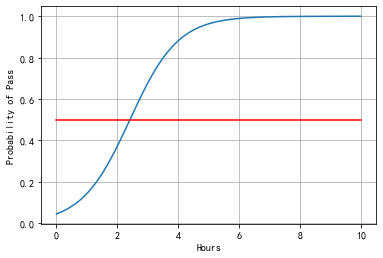

In [13]:
# 训练完测试
x= np.linspace(0,10,200)
# 二百行一列矩阵
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()